In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import shap
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os
from joblib import dump, load
import pickle

from nilearn import plotting
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import linregress
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Age/Models/'
import sys
sys.path.append(path_) 

# Eliminar valores atipicos de AD

In [11]:
file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'

In [4]:
significant_features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_OCC_left', 'IAF_OCC_right']

In [17]:
df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)

df_CN_filtrado = df_CN[(df_CN['Age'] >= 60) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 60) & (df_AD['Age'] <= 90)].reset_index(drop=True)

X_CN = df_CN_filtrado[significant_features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[significant_features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

In [14]:
def regression_metrics( y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)

X_CN_train, X_CN_test, y_CN_train, y_CN_test = train_test_split(X_CN_scaled, y_CN, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_CN_train, y_CN_train)

y_pred_CN_test = modelo.predict(X_CN_test)

mse_CN_test = mean_squared_error(y_CN_test, y_pred_CN_test)
r2_CN_test = r2_score(y_CN_test, y_pred_CN_test)
print(f"Resultados en CN (test): MSE = {mse_CN_test}, R2 = {r2_CN_test}")

y_pred_AD = modelo.predict(X_AD_scaled)

mse_AD = mean_squared_error(y_AD, y_pred_AD)
r2_AD = r2_score(y_AD, y_pred_AD)
print(f"Resultados en AD: MSE = {mse_AD}, R2 = {r2_AD}")

residuals_AD = y_AD - y_pred_AD  # Calcular los residuales (errores)
print(f"Residuals en AD: {residuals_AD}")


Resultados en CN (test): MSE = 39.38394370836647, R2 = -0.07953068970514399
Resultados en AD: MSE = 18817180523648.07, R2 = -466615092215.7063
Residuals en AD: 0       4.025946
1       1.834064
2      21.696771
3       0.029678
4      -0.776440
         ...    
290     7.345371
291     2.700878
292     4.425545
293    -6.239649
294    13.043842
Name: Age, Length: 295, dtype: float64


In [20]:
import pandas as pd

# Supongamos que ya has cargado df_AD_filtrado y has hecho las predicciones con y_pred_AD
# Identificar los índices donde la predicción supera 200 en valor absoluto
indices_atipicos = abs(y_pred_AD) > 200

# Obtener los IDs correspondientes a estos índices
ids_atipicos = df_AD_filtrado.loc[indices_atipicos, "ID-unique"]

# Imprimir los IDs atípicos
print(f"IDs atípicos con predicciones > 200: {ids_atipicos.tolist()}")

# Crear un nuevo DataFrame filtrado sin los sujetos con IDs atípicos
df_AD_filtrado_sin_atipicos = df_AD_filtrado[~df_AD_filtrado["ID-unique"].isin(ids_atipicos)].reset_index(drop=True)

# Verificar el tamaño del nuevo DataFrame
print(f"Nuevo tamaño del DataFrame filtrado: {df_AD_filtrado_sin_atipicos.shape}")


IDs atípicos con predicciones > 200: [161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Nuevo tamaño del DataFrame filtrado: (260, 232)


In [22]:
file_path_AD_2 = f'{path}Brain_Aging/AD_freq_2.xlsx'
df_AD_filtrado_sin_atipicos.to_excel(file_path_AD_2, index=False)


# Aqui empieza

In [23]:
file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq_2.xlsx'

In [24]:
significant_features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_OCC_left', 'IAF_OCC_right']

In [25]:
df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)

df_CN_filtrado = df_CN[(df_CN['Age'] >= 60) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 60) & (df_AD['Age'] <= 90)].reset_index(drop=True)

X_CN = df_CN_filtrado[significant_features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[significant_features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

Rregresión lineal multiple para probar 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)

X_CN_train, X_CN_test, y_CN_train, y_CN_test = train_test_split(X_CN_scaled, y_CN, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_CN_train, y_CN_train)

y_pred_CN_test = modelo.predict(X_CN_test)

mse_CN_test = mean_squared_error(y_CN_test, y_pred_CN_test)
r2_CN_test = r2_score(y_CN_test, y_pred_CN_test)
print(f"Resultados en CN (test): MSE = {mse_CN_test}, R2 = {r2_CN_test}")

y_pred_AD = modelo.predict(X_AD_scaled)

mse_AD = mean_squared_error(y_AD, y_pred_AD)
r2_AD = r2_score(y_AD, y_pred_AD)
print(f"Resultados en AD: MSE = {mse_AD}, R2 = {r2_AD}")

residuals_AD = y_AD - y_pred_AD  # Calcular los residuales (errores)
print(f"Residuals en AD: {residuals_AD}")


Resultados en CN (test): MSE = 39.38394370836647, R2 = -0.07953068970514399
Resultados en AD: MSE = 82.59581907847996, R2 = -1.1618794351736503
Residuals en AD: 0       4.025946
1       1.834064
2      21.696771
3       0.029678
4      -0.776440
         ...    
255     7.345371
256     2.700878
257     4.425545
258    -6.239649
259    13.043842
Name: Age, Length: 260, dtype: float64


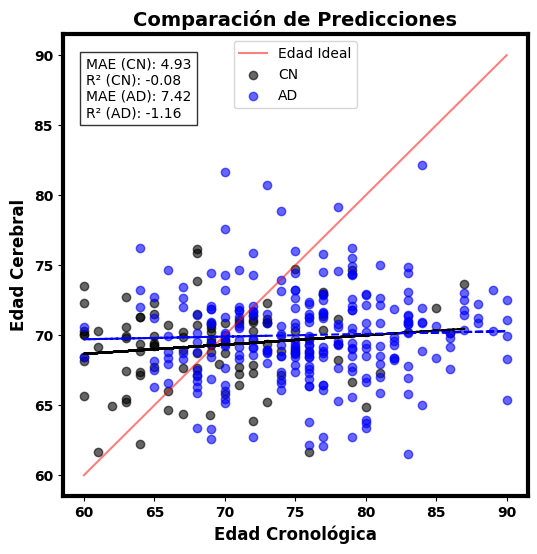

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

fold = 0
# Obtener los valores de los dataframes
y_cn = y_CN_test
y_cn_pred = y_pred_CN_test
y_ad = y_AD
y_ad_pred = y_pred_AD

# Calcular la línea de tendencia lineal para cada conjunto de datos
m_cn, c_cn = np.polyfit(y_cn, y_cn_pred, 1)
m_ad, c_ad = np.polyfit(y_ad, y_ad_pred, 1)

# Graficar las predicciones vs. la edad real en el conjunto de prueba
plt.figure(figsize=(6, 6))


plt.plot([60, 90], [60, 90], color='red',alpha=0.5, linestyle='-', label='Edad Ideal')

# Scatter plot y línea de tendencia para el conjunto de prueba
plt.scatter(y_cn, y_cn_pred, color='black', alpha=0.6, label='CN')
plt.plot(y_cn, m_cn * y_cn + c_cn, color='black', linestyle='--')

# Scatter plot y línea de tendencia para el conjunto AD filtrado
plt.scatter(y_ad, y_ad_pred, color='blue', alpha=0.6, label='AD')
plt.plot(y_ad, m_ad * y_ad + c_ad, color='blue', linestyle='--')



# Título en negrita
plt.title('Comparación de Predicciones', fontweight='bold', fontsize=14)

# Etiquetas de ejes en negrita
plt.xlabel('Edad Cronológica', fontweight='bold', fontsize=12)
plt.ylabel('Edad Cerebral', fontweight='bold', fontsize=12)

# Ajustar el grosor y color del borde interior del cuadro
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)
    spine.set_color('black')

# Configurar números de los ejes en negrita
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Calcular y mostrar métricas para ambos conjuntos
mae_test = mean_absolute_error(y_cn, y_cn_pred)
r2_test = r2_score(y_cn, y_cn_pred)
mae_ad = mean_absolute_error(y_ad, y_ad_pred)
r2_ad = r2_score(y_ad,y_ad_pred)

metrics_str = (
    f'MAE (CN): {mae_test:.2f}\n'
    f'R² (CN): {r2_test:.2f}\n'
    f'MAE (AD): {mae_ad:.2f}\n'
    f'R² (AD): {r2_ad:.2f}'
)
plt.text(0.05, 0.95, metrics_str, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Configurar límite del eje y
#plt.ylim(50, 90)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [36]:
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)


In [41]:
best_fold = 0
best_score = float('inf')
best_model = None

metrics = ['mae', 'mse', 'rmse', 'r2']
results = {'train': {m: [] for m in metrics}, 
           'test': {m: [] for m in metrics}, 
           'AD': {m: [] for m in metrics},
           'model': []}

results_per_fold_AD = {}
results_per_fold_CN = {}

# Inicializar DataFrames para almacenar resultados de predicciones y GAP
results_labels_df_CN = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID'])
results_labels_df_AD = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID'])

# Número de splits para KFold
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=126)

for fold, (train_index, test_index) in enumerate(kf.split(X_CN_scaled, y_CN)):
    X_train_kf, X_test_kf = X_CN_scaled.iloc[train_index], X_CN_scaled.iloc[test_index]
    y_train_kf, y_test_kf = y_CN.iloc[train_index], y_CN.iloc[test_index]
    id_train_kf, id_test_kf = ID_CN.iloc[train_index], ID_CN.iloc[test_index]
    # Crear y entrenar el modelo en el fold actual
    model = LinearRegression() 
    model.fit(X_train_kf[significant_features], y_train_kf)

    # Predicciones para el conjunto de entrenamiento
    y_pred_train = model.predict(X_train_kf[significant_features])
    train_metrics = regression_metrics(y_train_kf, y_pred_train)

    # Predicciones para el conjunto de prueba
    y_pred_test = model.predict(X_test_kf[significant_features])
    test_metrics = regression_metrics(y_test_kf, y_pred_test)

    # Predicciones para el conjunto de Alzheimer
    y_pred_AD = model.predict(X_AD_scaled[significant_features])
    AD_metrics = regression_metrics(y_AD, y_pred_AD)

    # Calcular los GAPs
    gap_test = y_pred_test - y_test_kf
    gap_train = y_pred_train - y_train_kf
    gap_AD = y_pred_AD - y_AD 

    # Ajuste de la regresión lineal sobre el conjunto de entrenamiento
    slope, intercept, _, _, _ = linregress(y_train_kf, gap_train)

    # Corrección de GAPs para el conjunto de prueba y AD
    corrected_gap = gap_test - (slope * y_test_kf + intercept)
    corrected_gap_AD = gap_AD - (slope * y_AD + intercept)

    # Predicciones corregidas
    y_pred_corrected = y_pred_test - (slope * y_test_kf + intercept)
    y_pred_corrected_AD = y_pred_AD - (slope * y_AD + intercept) 

    # Almacenar los resultados de predicciones y correcciones para controles (CN) en cada fold
    temp_CN_df = pd.DataFrame({
        'y_labels': y_test_kf,
        'y_pred': y_pred_test,
        'y_pred_corrected': y_pred_corrected,
        'GAP': gap_test,
        'GAP_corrected': corrected_gap,
        'ID': id_test_kf
    })
    results_labels_df_CN = pd.concat([results_labels_df_CN, temp_CN_df], ignore_index=True)
    results_per_fold_CN[fold] = temp_CN_df.copy()

    # Almacenar los resultados de predicciones y correcciones para AD
    temp_AD_df = pd.DataFrame({
        'y_labels': y_AD,
        'y_pred': y_pred_AD,
        'y_pred_corrected': y_pred_corrected_AD,
        'GAP': gap_AD,
        'GAP_corrected': corrected_gap_AD
    })

    results_labels_df_AD = pd.concat([results_labels_df_AD, temp_AD_df], ignore_index=True)


    results_per_fold_AD[fold] = temp_AD_df.copy()

    # Almacenar los resultados de las métricas
    for ds in ['train', 'test', 'AD']:
        if ds == 'train':
            metrics_set = train_metrics
        elif ds == 'test':
            metrics_set = test_metrics
        else:
            metrics_set = AD_metrics
            
        for i, metric in enumerate(metrics):
            results[ds][metric].append(metrics_set[i])

    # Almacenar el modelo
    results['model'].append(model)


C:\Users\felipe\AppData\Local\Temp\ipykernel_17680\134681828.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN = pd.concat([results_labels_df_CN, temp_CN_df], ignore_index=True)
C:\Users\felipe\AppData\Local\Temp\ipykernel_17680\134681828.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_AD = pd.concat([results_labels_df_AD, temp_AD_df], ignore_index=True)


In [42]:
results_labels_df_CN

,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,ID
0,68.0,68.884686,67.681794,0.884686,-0.318206,111
1,73.0,66.664708,69.438957,-6.335292,-3.561043,210
2,70.0,68.475383,68.863348,-1.524617,-1.136652,215
3,70.0,72.713033,73.100998,2.713033,3.100998,231
4,68.0,70.249186,69.046295,2.249186,1.046295,233
...,...,...,...,...,...,...
516,73.0,70.378357,73.455240,-2.621643,0.455240,916
517,71.0,67.227667,68.617655,-3.772333,-2.382345,1100
518,64.0,68.030626,63.516486,4.030626,-0.483514,1105
519,63.0,66.621154,61.263567,3.621154,-1.736433,1111


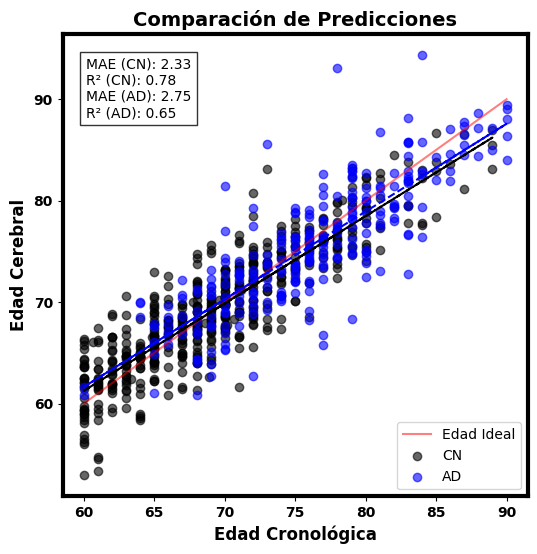

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

fold = 0
# Obtener los valores de los dataframes
y_cn = results_labels_df_CN['y_labels'].values
y_cn_pred = results_labels_df_CN['y_pred_corrected'].values
#y_cn = results_per_fold_CN[fold]['y_labels'].values
#y_cn_pred = results_per_fold_CN[fold]['y_pred_corrected'].values
#y_ad = pd.to_numeric(results_labels_df_AD['y_labels'])
#y_ad_pred = pd.to_numeric(results_labels_df_AD['y_pred'])
y_ad = results_per_fold_AD[fold]['y_labels'].values
y_ad_pred = results_per_fold_AD[fold]['y_pred_corrected'].values

# Calcular la línea de tendencia lineal para cada conjunto de datos
m_cn, c_cn = np.polyfit(y_cn, y_cn_pred, 1)
m_ad, c_ad = np.polyfit(y_ad, y_ad_pred, 1)

# Graficar las predicciones vs. la edad real en el conjunto de prueba
plt.figure(figsize=(6, 6))


plt.plot([60, 90], [60, 90], color='red',alpha=0.5, linestyle='-', label='Edad Ideal')

# Scatter plot y línea de tendencia para el conjunto de prueba
plt.scatter(y_cn, y_cn_pred, color='black', alpha=0.6, label='CN')
plt.plot(y_cn, m_cn * y_cn + c_cn, color='black', linestyle='--')

# Scatter plot y línea de tendencia para el conjunto AD filtrado
plt.scatter(y_ad, y_ad_pred, color='blue', alpha=0.6, label='AD')
plt.plot(y_ad, m_ad * y_ad + c_ad, color='blue', linestyle='--')



# Título en negrita
plt.title('Comparación de Predicciones', fontweight='bold', fontsize=14)

# Etiquetas de ejes en negrita
plt.xlabel('Edad Cronológica', fontweight='bold', fontsize=12)
plt.ylabel('Edad Cerebral', fontweight='bold', fontsize=12)

# Ajustar el grosor y color del borde interior del cuadro
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)
    spine.set_color('black')

# Configurar números de los ejes en negrita
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Calcular y mostrar métricas para ambos conjuntos
mae_test = mean_absolute_error(y_cn, y_cn_pred)
r2_test = r2_score(y_cn, y_cn_pred)
mae_ad = mean_absolute_error(y_ad, y_ad_pred)
r2_ad = r2_score(y_ad,y_ad_pred)

metrics_str = (
    f'MAE (CN): {mae_test:.2f}\n'
    f'R² (CN): {r2_test:.2f}\n'
    f'MAE (AD): {mae_ad:.2f}\n'
    f'R² (AD): {r2_ad:.2f}'
)
plt.text(0.05, 0.95, metrics_str, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Configurar límite del eje y
#plt.ylim(50, 90)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# Aqui va lo nuevo

In [3]:
file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq_2.xlsx'

In [4]:
significant_features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_OCC_left', 'IAF_OCC_right']

In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import linregress

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)

df_CN_filtrado = df_CN[(df_CN['Age'] >= 60) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 60) & (df_AD['Age'] <= 90)].reset_index(drop=True)

X_CN = df_CN_filtrado[significant_features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[significant_features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

best_fold = 0
best_score = float('inf')
best_model = None

metrics = ['mae', 'mse', 'rmse', 'r2']
results = {'train': {m: [] for m in metrics}, 
           'test': {m: [] for m in metrics}, 
           'AD': {m: [] for m in metrics},
           'model': []}

results_per_fold_AD = {}
results_per_fold_CN = {}

results_labels_df_CN = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID'])
results_labels_df_AD = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID'])

n_splits = 10
n_iterations = 20

for i in range(n_iterations):
    kf_CN = KFold(n_splits=n_splits, shuffle=True, random_state=i)
    kf_AD = KFold(n_splits=n_splits, shuffle=True, random_state=i)

    # Dividir X_AD_scaled en 10 folds
    kf_AD_splits = list(kf_AD.split(X_AD, y_AD))

    for fold_CN, (train_index_CN, test_index_CN) in enumerate(kf_CN.split(X_CN, y_CN)):
        X_train_kf_CN, X_test_kf_CN = X_CN.iloc[train_index_CN], X_CN.iloc[test_index_CN]
        y_train_kf_CN, y_test_kf_CN = y_CN.iloc[train_index_CN], y_CN.iloc[test_index_CN]
        id_train_kf_CN, id_test_kf_CN = ID_CN.iloc[train_index_CN], ID_CN.iloc[test_index_CN]
        
        mean_X_train_kf_CN = X_train_kf_CN.mean()
        std_X_train_kf_CN = X_train_kf_CN.std()

        X_train_kf_CN_scaled  = (X_train_kf_CN - mean_X_train_kf_CN) / std_X_train_kf_CN
        X_test_kf_CN_scaled  = (X_test_kf_CN - mean_X_train_kf_CN) / std_X_train_kf_CN
        
        # Crear y entrenar el modelo en el fold actual
        model = LinearRegression()
        model.fit(X_train_kf_CN_scaled, y_train_kf_CN)

        # Predicciones para el conjunto de entrenamiento
        y_pred_train = model.predict(X_train_kf_CN_scaled)
        train_metrics = regression_metrics(y_train_kf_CN, y_pred_train)

        # Predicciones para el conjunto de prueba
        y_pred_test = model.predict(X_test_kf_CN_scaled)
        test_metrics = regression_metrics(y_test_kf_CN, y_pred_test)


        # Obtener el fold correspondiente de X_AD_scaled
        train_index_AD, test_index_AD = kf_AD_splits[fold_CN]
        X_test_kf_AD = X_AD.iloc[test_index_AD]
        X_test_kf_AD_scaled = (X_test_kf_AD - mean_X_train_kf_CN) / std_X_train_kf_CN
        y_test_kf_AD = y_AD.iloc[test_index_AD]
        id_train_kf_AD, id_test_kf_AD = ID_AD.iloc[train_index_AD], ID_AD.iloc[test_index_AD]

        # Predicciones para el fold correspondiente de AD usando el modelo entrenado en el fold CN
        y_pred_AD = model.predict(X_test_kf_AD_scaled)
        AD_metrics = regression_metrics(y_test_kf_AD, y_pred_AD)

        # Calcular los GAPs
        gap_test = y_pred_test - y_test_kf_CN
        gap_train = y_pred_train - y_train_kf_CN
        gap_AD = y_pred_AD - y_test_kf_AD 

        # Ajuste de la regresión lineal sobre el conjunto de entrenamiento
        slope, intercept, _, _, _ = linregress(y_train_kf_CN, gap_train)

        # Corrección de GAPs para el conjunto de prueba y AD
        corrected_gap = gap_test - (slope * y_test_kf_CN + intercept)
        corrected_gap_AD = gap_AD - (slope * y_test_kf_AD + intercept)

        # Predicciones corregidas
        y_pred_corrected = y_pred_test - (slope * y_test_kf_CN + intercept)
        y_pred_corrected_AD = y_pred_AD - (slope * y_test_kf_AD + intercept) 

        # Almacenar los resultados de predicciones y correcciones para controles (CN) en cada fold
        temp_CN_df = pd.DataFrame({
            'y_labels': y_test_kf_CN,
            'y_pred': y_pred_test,
            'y_pred_corrected': y_pred_corrected,
            'GAP': gap_test,
            'GAP_corrected': corrected_gap,
            'ID': id_test_kf_CN
        })
        results_labels_df_CN = pd.concat([results_labels_df_CN, temp_CN_df], ignore_index=True)
        results_per_fold_CN[fold_CN] = temp_CN_df.copy()

        # Almacenar los resultados de predicciones y correcciones para AD
        temp_AD_df = pd.DataFrame({
            'y_labels': y_test_kf_AD,
            'y_pred': y_pred_AD,
            'y_pred_corrected': y_pred_corrected_AD,
            'GAP': gap_AD,
            'GAP_corrected': corrected_gap_AD,
            'ID': id_test_kf_AD
        })

        results_labels_df_AD = pd.concat([results_labels_df_AD, temp_AD_df], ignore_index=True)
        results_per_fold_AD[fold_CN] = temp_AD_df.copy()

        # Almacenar los resultados de las métricas
        for ds in ['train', 'test', 'AD']:
            if ds == 'train':
                metrics_set = train_metrics
            elif ds == 'test':
                metrics_set = test_metrics
            else:
                metrics_set = AD_metrics
                
            for i, metric in enumerate(metrics):
                results[ds][metric].append(metrics_set[i])

        # Almacenar el modelo
        results['model'].append(model)


C:\Users\felipe\AppData\Local\Temp\ipykernel_4728\1752074731.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN = pd.concat([results_labels_df_CN, temp_CN_df], ignore_index=True)
C:\Users\felipe\AppData\Local\Temp\ipykernel_4728\1752074731.py:126: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_AD = pd.concat([results_labels_df_AD, temp_AD_df], ignore_index=True)


In [13]:
results_labels_df_AD

,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,ID
0,79,70.803034,78.775426,-8.196966,-0.224574,7
1,73,68.902923,71.831837,-4.097077,-1.168163,9
2,65,70.480326,66.684603,5.480326,1.684603,39
3,75,71.129445,75.739519,-3.870555,0.739519,47
4,66,70.312300,67.357157,4.312300,1.357157,57
...,...,...,...,...,...,...
5195,75,72.051434,76.714686,-2.948566,1.714686,255
5196,81,63.574380,73.220732,-17.425620,-7.779268,257
5197,83,66.677237,77.984622,-16.322763,-5.015378,262
5198,77,70.870190,77.194474,-6.129810,0.194474,285


In [14]:
import pandas as pd

# Promediar los valores por ID en results_labels_df_CN
results_avg_CN = results_labels_df_CN.groupby('ID').agg({
    'y_labels': 'mean',
    'y_pred': 'mean',
    'y_pred_corrected': 'mean',
    'GAP': 'mean',
    'GAP_corrected': 'mean'
}).reset_index()

# Promediar los valores por ID en results_labels_df_AD
results_avg_AD = results_labels_df_AD.groupby('ID').agg({
    'y_labels': 'mean',
    'y_pred': 'mean',
    'y_pred_corrected': 'mean',
    'GAP': 'mean',
    'GAP_corrected': 'mean'
}).reset_index()

print("Results average for CN:")
print(results_avg_CN.head())

print("Results average for AD:")
print(results_avg_AD.head())


Results average for CN:
    ID  y_labels     y_pred  y_pred_corrected        GAP  GAP_corrected
0   47      62.0  65.798110         59.657382   3.798110      -2.342618
1   55      62.0  76.968369         70.839298  14.968369       8.839298
2  111      68.0  68.201283         67.052176   0.201283      -0.947824
3  209      69.0  74.811701         74.504796   5.811701       5.504796
4  210      73.0  63.835661         66.868202  -9.164339      -6.131798
Results average for AD:
   ID y_labels     y_pred  y_pred_corrected        GAP  GAP_corrected
0   0     73.0  69.393106         72.418246  -3.606894      -0.581754
1   1     71.0  66.188284         67.547325  -4.811716      -3.452675
2   2     90.0  69.041512         86.085258 -20.958488      -3.914742
3   3     74.0  72.043601         75.845807  -1.956399       1.845807
4   4     71.0  71.483313         72.822431   0.483313       1.822431


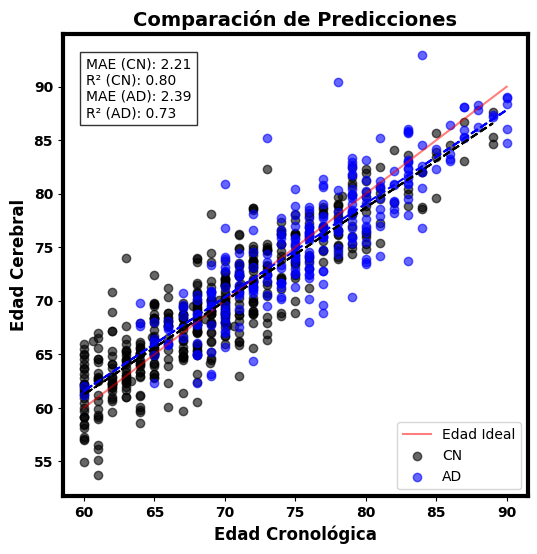

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

fold = 0
# Obtener los valores de los dataframes
y_cn = results_avg_CN['y_labels'].values
y_cn_pred = results_avg_CN['y_pred_corrected'].values
#y_cn = results_per_fold_CN[fold]['y_labels'].values
#y_cn_pred = results_per_fold_CN[fold]['y_pred_corrected'].values
#y_ad = results_avg_AD['y_labels'].values
#y_ad_pred = results_avg_AD['y_pred_corrected'].values
y_ad = pd.to_numeric(results_avg_AD['y_labels'])
y_ad_pred = pd.to_numeric(results_avg_AD['y_pred_corrected'])
#y_ad = results_per_fold_AD[fold]['y_labels'].values
#y_ad_pred = results_per_fold_AD[fold]['y_pred_corrected'].values

# Calcular la línea de tendencia lineal para cada conjunto de datos
m_cn, c_cn = np.polyfit(y_cn, y_cn_pred, 1)
m_ad, c_ad = np.polyfit(y_ad, y_ad_pred, 1)

# Graficar las predicciones vs. la edad real en el conjunto de prueba
plt.figure(figsize=(6, 6))


plt.plot([60, 90], [60, 90], color='red',alpha=0.5, linestyle='-', label='Edad Ideal')

# Scatter plot y línea de tendencia para el conjunto de prueba
plt.scatter(y_cn, y_cn_pred, color='black', alpha=0.6, label='CN')
plt.plot(y_cn, m_cn * y_cn + c_cn, color='black', linestyle='--')

# Scatter plot y línea de tendencia para el conjunto AD filtrado
plt.scatter(y_ad, y_ad_pred, color='blue', alpha=0.6, label='AD')
plt.plot(y_ad, m_ad * y_ad + c_ad, color='blue', linestyle='--')



# Título en negrita
plt.title('Comparación de Predicciones', fontweight='bold', fontsize=14)

# Etiquetas de ejes en negrita
plt.xlabel('Edad Cronológica', fontweight='bold', fontsize=12)
plt.ylabel('Edad Cerebral', fontweight='bold', fontsize=12)

# Ajustar el grosor y color del borde interior del cuadro
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)
    spine.set_color('black')

# Configurar números de los ejes en negrita
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Calcular y mostrar métricas para ambos conjuntos
mae_test = mean_absolute_error(y_cn, y_cn_pred)
r2_test = r2_score(y_cn, y_cn_pred)
mae_ad = mean_absolute_error(y_ad, y_ad_pred)
r2_ad = r2_score(y_ad,y_ad_pred)

metrics_str = (
    f'MAE (CN): {mae_test:.2f}\n'
    f'R² (CN): {r2_test:.2f}\n'
    f'MAE (AD): {mae_ad:.2f}\n'
    f'R² (AD): {r2_ad:.2f}'
)
plt.text(0.05, 0.95, metrics_str, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Configurar límite del eje y
#plt.ylim(50, 90)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_4728\1649180174.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


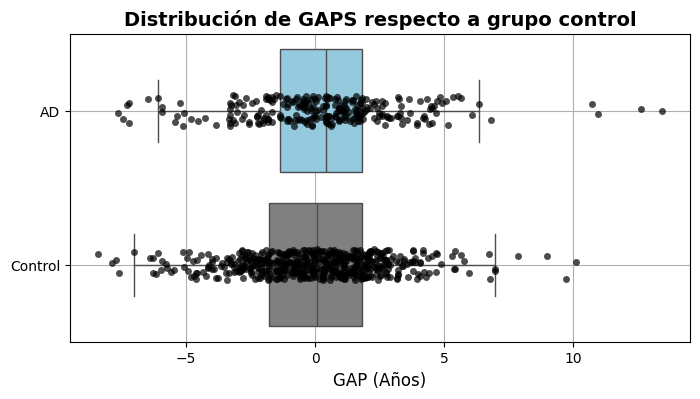

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fold = 0

# Obtener los valores de los dataframes
#y_cn = results_labels_df_CN['y_labels'].values
#y_cn_pred = results_labels_df_CN['y_pred_corrected'].values
y_cn = results_avg_CN['y_labels'].values
y_cn_pred = results_avg_CN['y_pred_corrected'].values

#y_ad = pd.to_numeric(results_labels_df_AD['y_labels'])
#y_ad_pred = pd.to_numeric(results_labels_df_AD['y_pred'])
#y_ad = results_avg_AD['y_labels'].values
#y_ad_pred = results_avg_AD['y_pred'].values

y_ad = pd.to_numeric(results_avg_AD['y_labels'])
y_ad_pred = pd.to_numeric(results_avg_AD['y_pred_corrected'])


m_cn, c_cn = np.polyfit(y_cn, y_cn_pred, 1)
m_ad, c_ad = np.polyfit(y_ad, y_ad_pred, 1)

# Calcular los errores absolutos
#gap_cn = results_labels_df_CN['y_pred'].values - (m_cn * results_labels_df_CN['y_labels'].values + c_cn)
gap_cn = y_cn_pred - (m_cn * y_cn + c_cn)

#gap_ad = results_labels_df_AD['y_pred'].values - (m_cn * results_labels_df_AD['y_labels'].values + c_cn)
gap_ad = y_ad_pred - (m_cn * y_ad + c_cn)



# Crear un DataFrame en formato largo para los errores absolutos
data = {
    'Error': np.concatenate([gap_ad, gap_cn]),
    'Grupo': ['AD'] * len(gap_ad) + ['Control'] * len(gap_cn)
}

df_errors = pd.DataFrame(data)

# Colores personalizados
colores_personalizados = {
    'AD': 'skyblue',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5, alpha=0.7, jitter=True)

plt.title('Distribución de GAPS respecto a grupo control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('GAP (Años)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_4728\2065381264.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


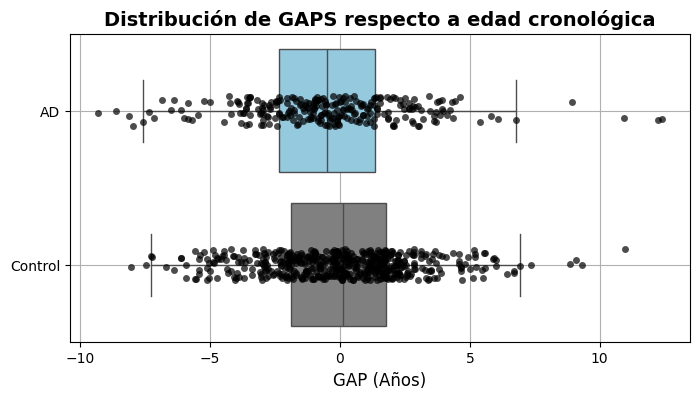

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fold = 0

# Obtener los valores de los dataframes
#y_cn = results_labels_df_CN['y_labels'].values
#y_cn_pred = results_labels_df_CN['y_pred_corrected'].values
#y_cn = results_avg_CN['y_labels'].values
#y_cn_pred = results_avg_CN['y_pred'].values

#y_ad = pd.to_numeric(results_labels_df_AD['y_labels'])
#y_ad_pred = pd.to_numeric(results_labels_df_AD['y_pred'])
#y_ad = results_avg_AD['y_labels'].values
#y_ad_pred = results_avg_AD['y_pred'].values

#y_ad = pd.to_numeric(results_avg_AD['y_labels'])
#y_ad_pred = pd.to_numeric(results_avg_AD['y_pred_corrected'])


m_cn, c_cn = np.polyfit(y_cn, y_cn_pred, 1)
m_ad, c_ad = np.polyfit(y_ad, y_ad_pred, 1)

# Calcular los errores absolutos
#gap_cn = results_labels_df_CN['y_pred'].values - (m_cn * results_labels_df_CN['y_labels'].values + c_cn)
#gap_cn = y_cn_pred - (m_cn * y_cn + c_cn)

#gap_ad = results_labels_df_AD['y_pred'].values - (m_cn * results_labels_df_AD['y_labels'].values + c_cn)
#gap_ad = y_ad_pred - (m_cn * y_ad + c_cn)

gap_cn = results_avg_CN['GAP_corrected'].values
gap_ad = results_avg_AD['GAP_corrected'].values

# Crear un DataFrame en formato largo para los errores absolutos
data = {
    'Error': np.concatenate([gap_ad, gap_cn]),
    'Grupo': ['AD'] * len(gap_ad) + ['Control'] * len(gap_cn)
}

df_errors = pd.DataFrame(data)

# Colores personalizados
colores_personalizados = {
    'AD': 'skyblue',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5, alpha=0.7, jitter=True)

plt.title('Distribución de GAPS respecto a edad cronológica', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('GAP (Años)', fontsize=12)
plt.grid(True)
plt.show()
